arch-1 ideal epochs count = 15 , but without any regularization, training acc is still improving but testing starts to go down

In [12]:
import pandas as pd
import tensorflow as tf
import tensorflow.keras.layers as layers
import matplotlib.pyplot as plt
import numpy as np
from imblearn.over_sampling import SMOTE

In [13]:
#The dataset contains no header for columns, hence the header parameter
dataframe=pd.read_csv('./mitbih_train.csv',header=None)

In [14]:
#Last column is the category column, a scaler value from 0 to 4
y=dataframe[dataframe.columns[-1:]]
x=dataframe[dataframe.columns[:-1]]

In [15]:
# Balances the dataset by oversampling it (it seems like it uses interpolation)
# https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/
oversampler=SMOTE()
x,y=oversampler.fit_resample(x,y)

In [16]:
y=y.to_numpy()

In [17]:
x=x.to_numpy()

In [18]:
#Change the value to only use a subset of the dataset (like for quick tests...)
x=x[:362355][:][:]
y=y[:362355][:]
#Add data dimension, doesn't actually change the data but that's how the input is expected, like it could have multiple values per timestamp
x=x.reshape([362355,187,1])

In [19]:
model=tf.keras.Sequential(
    [layers.Conv1D(7, 7, activation='relu', input_shape=(187,1)),
    layers.BatchNormalization(),
    layers.MaxPool1D(),
    layers.Conv1D(5,5,activation='relu'),
     layers.BatchNormalization(),
    layers.MaxPool1D(),
     layers.Conv1D(3,3,activation='relu'),
     layers.BatchNormalization(),
     layers.MaxPool1D(),
    layers.Flatten(),
     layers.Dense(64,activation='relu'),
     layers.Dense(32,activation='relu'),
    layers.Dense(5,activation='softmax')] #softmax cuz categories
)

In [20]:
model.compile('adam','sparse_categorical_crossentropy',metrics=['accuracy']) #this was with validation
history=model.fit(x,y,batch_size=1000,epochs=15,verbose=True)

2022-12-28 21:26:40.640475: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 271041540 exceeds 10% of free system memory.


Epoch 1/17
363/363 [==============================] - 22s 45ms/step - loss: 0.8373 - accuracy: 0.6764
Epoch 2/17
363/363 [==============================] - 16s 45ms/step - loss: 0.2465 - accuracy: 0.9135
Epoch 3/17
363/363 [==============================] - 16s 45ms/step - loss: 0.1721 - accuracy: 0.9414
Epoch 4/17
363/363 [==============================] - 16s 44ms/step - loss: 0.1368 - accuracy: 0.9543
Epoch 5/17
363/363 [==============================] - 16s 45ms/step - loss: 0.1146 - accuracy: 0.9624
Epoch 6/17
363/363 [==============================] - 16s 44ms/step - loss: 0.1026 - accuracy: 0.9661
Epoch 7/17
363/363 [==============================] - 16s 44ms/step - loss: 0.0913 - accuracy: 0.9699
Epoch 8/17
363/363 [==============================] - 16s 45ms/step - loss: 0.0829 - accuracy: 0.9731
Epoch 9/17
363/363 [==============================] - 16s 45ms/step - loss: 0.0782 - accuracy: 0.9751
Epoch 10/17
363/363 [==============================] - 16s 44ms/step - loss: 0.071

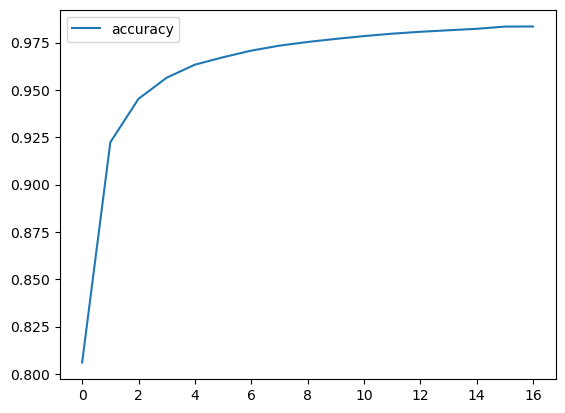

In [21]:
fig, ax = plt.subplots()  # Create a figure containing a single axes.
ax.plot(history.epoch, history.history['accuracy'],label='accuracy');
ax.legend()

In [22]:
pd.read_csv('./mitbih_test.csv', header=None)
y = dataframe[dataframe.columns[-1:]]
x = dataframe[dataframe.columns[:-1]]
y = y.to_numpy()

x = x.to_numpy()

x = x[:21892][:][:]
y = y[:21892][:]
x = x.reshape([21892, 187, 1])
history.model.evaluate(x, y, batch_size=500, verbose=True)

2022-12-28 21:31:25.843571: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 16375216 exceeds 10% of free system memory.


44/44 [==============================] - 1s 10ms/step - loss: 0.1014 - accuracy: 0.9653


[0.10137154161930084, 0.9652841091156006]